# **Milestone 3: Machine Learning Model Development and Optimization**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [40]:
df_scaled = pd.read_csv("scaled_data.csv")
df_encoded = pd.read_csv("encoded_data.csv")

In [41]:
from imblearn.combine import SMOTEENN
X = df_scaled.drop("Exited", axis=1)
y = df_scaled["Exited"]
smote_enn = SMOTEENN(random_state = 42)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### **1- Logistic Regression:**

Accuracy: 0.829126463398945
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     17328
           1       0.85      0.84      0.84     21537

    accuracy                           0.83     38865
   macro avg       0.83      0.83      0.83     38865
weighted avg       0.83      0.83      0.83     38865



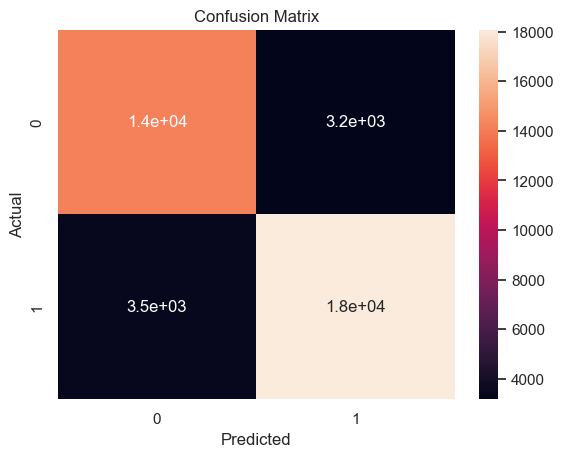

In [42]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(lr_model, X_train, y_train, cv=kf)
print (cv_results)
print (cv_results.mean())

[0.82925511 0.82971826 0.83133925 0.82883057 0.82883057 0.82767271]
0.8292744114241607


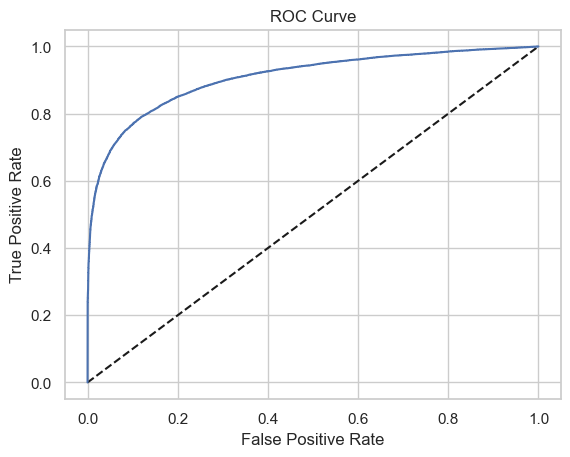

 AUC Score: 0.9078312603262886


In [44]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

**Hyperparameters**

c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

Best Parameters: {'C': 0.01, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     17328
           1       0.85      0.84      0.85     21537

    accuracy                           0.83     38865
   macro avg       0.83      0.83      0.83     38865
weighted avg       0.83      0.83      0.83     38865

Accuracy: 0.8295896050430979


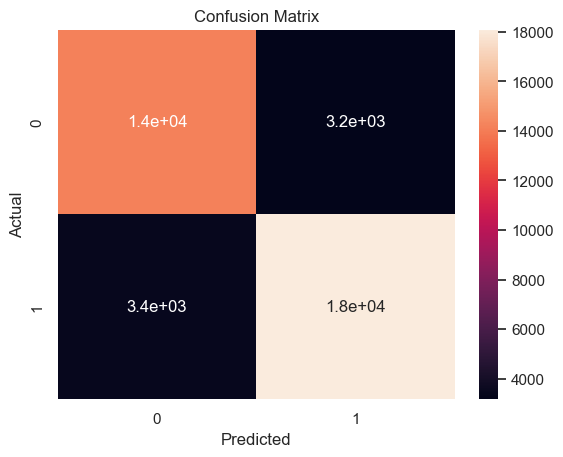

In [45]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [None, 0.5, 1]
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

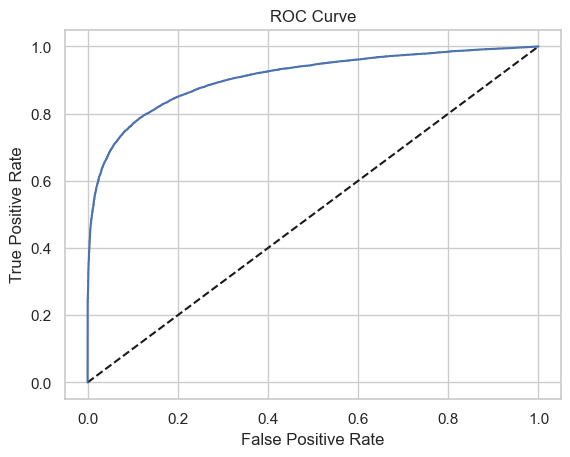

 AUC Score: 0.9077796596987786


In [46]:
y_pred_proba = best_model.predict_proba(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **2- KNN:**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9588665134309925
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     25939
           1       0.95      0.98      0.96     32359

    accuracy                           0.96     58298
   macro avg       0.96      0.96      0.96     58298
weighted avg       0.96      0.96      0.96     58298



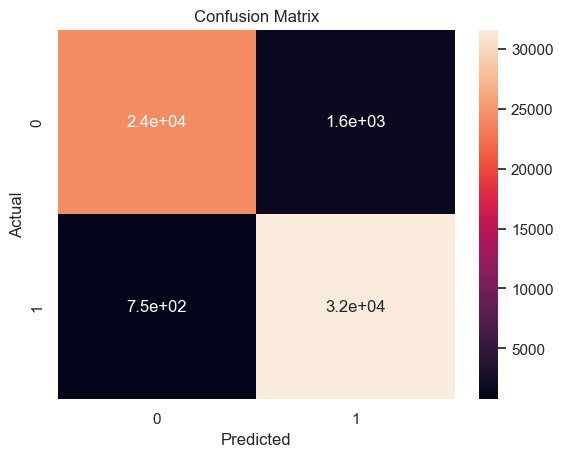

In [48]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

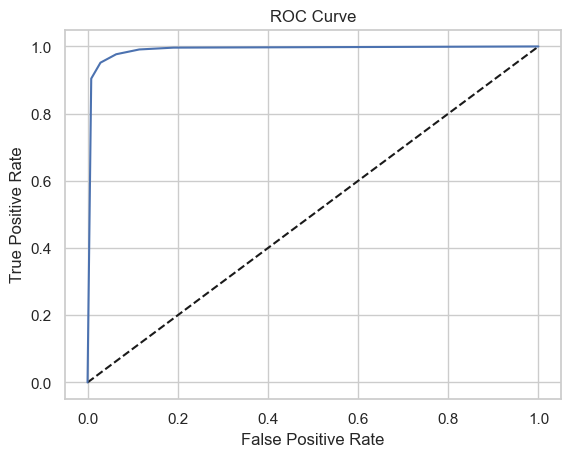

 AUC Score: 0.9900660676030871


In [49]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **3- Decision Tree:**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9354351778791725
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     25939
           1       0.94      0.95      0.94     32359

    accuracy                           0.94     58298
   macro avg       0.94      0.93      0.93     58298
weighted avg       0.94      0.94      0.94     58298



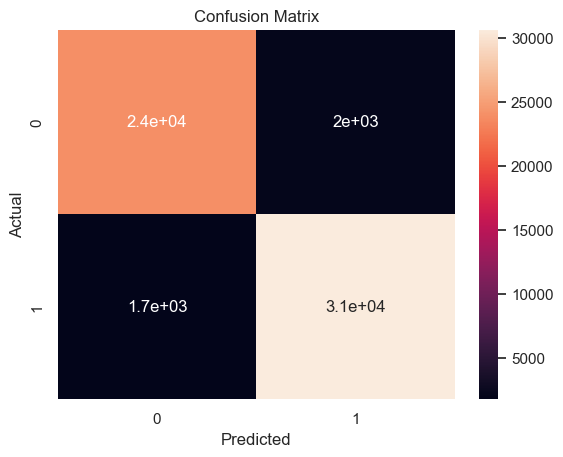

In [51]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

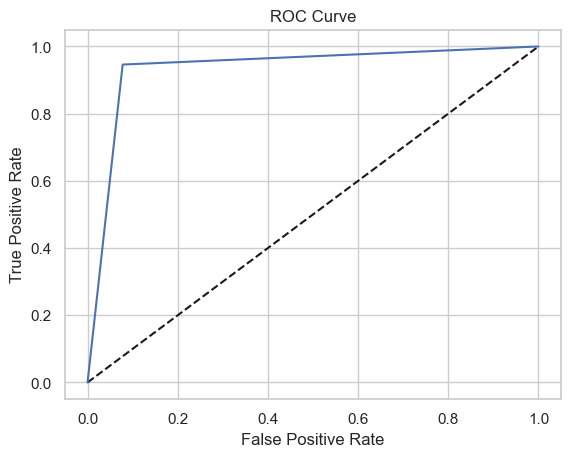

 AUC Score: 0.9341148120644347


In [52]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     25939
           1       0.94      0.95      0.94     32359

    accuracy                           0.94     58298
   macro avg       0.94      0.94      0.94     58298
weighted avg       0.94      0.94      0.94     58298

Accuracy: 0.9371505025901403


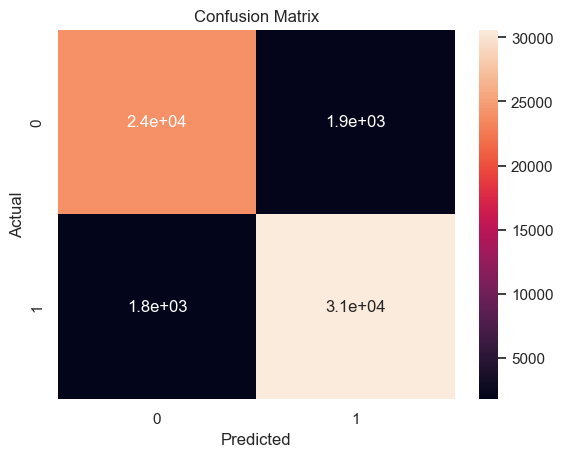

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

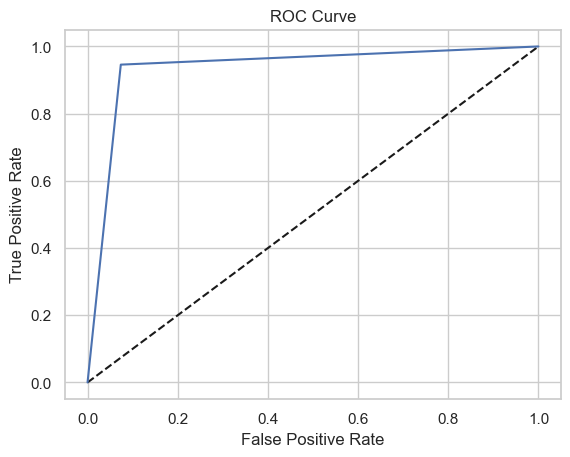

 AUC Score: 0.9360691818254535


In [54]:
y_pred_proba = best_model.predict_proba(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

## **4- Random Forest:**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9619026381694055
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     25939
           1       0.97      0.96      0.97     32359

    accuracy                           0.96     58298
   macro avg       0.96      0.96      0.96     58298
weighted avg       0.96      0.96      0.96     58298



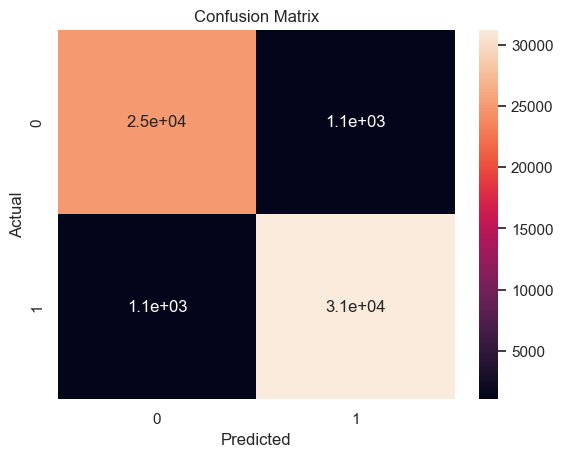

In [56]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

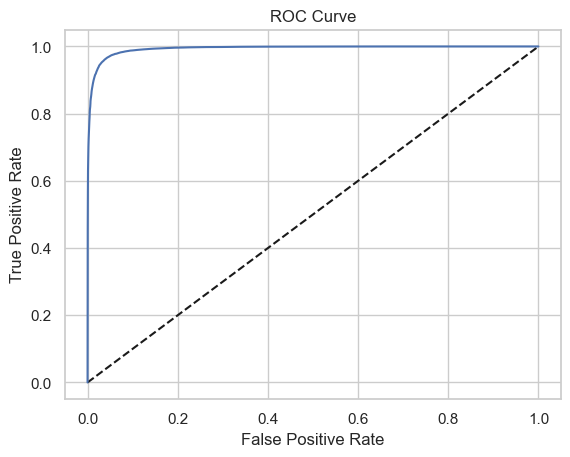

 AUC Score: 0.9932821181358488


In [57]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **5- XGBoost:**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9507701807952246
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     25939
           1       0.97      0.94      0.96     32359

    accuracy                           0.95     58298
   macro avg       0.95      0.95      0.95     58298
weighted avg       0.95      0.95      0.95     58298



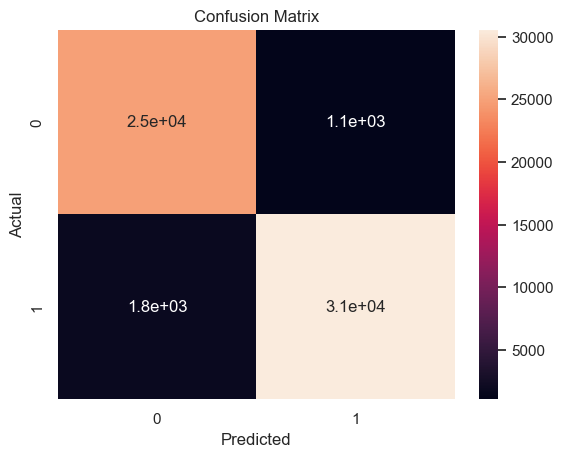

In [59]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

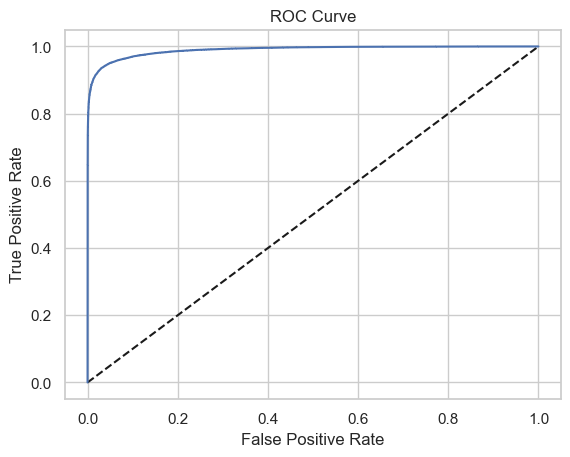

 AUC Score: 0.9894007834189393


In [60]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **6- LGBM:**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

[LightGBM] [Info] Number of positive: 75278, number of negative: 60749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 136027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553405 -> initscore=0.214437
[LightGBM] [Info] Start training from score 0.214437
Accuracy: 0.9504957288414697
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     25939
           1       0.97      0.94      0.95     32359

    accuracy                           0.95     58298
   macro avg       0.95      0.95      0.95     58298
weighted avg       0.95      0.95      0.95     58298



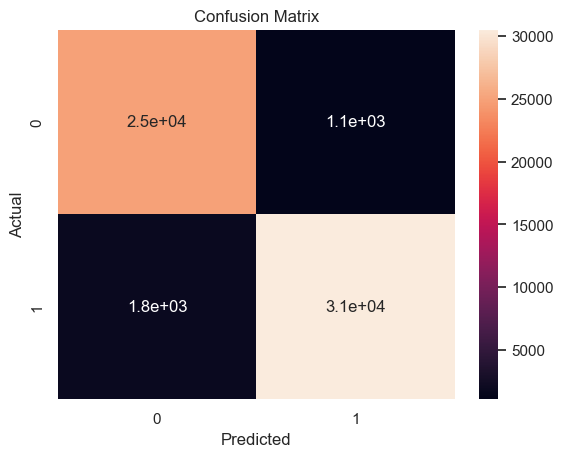

In [62]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

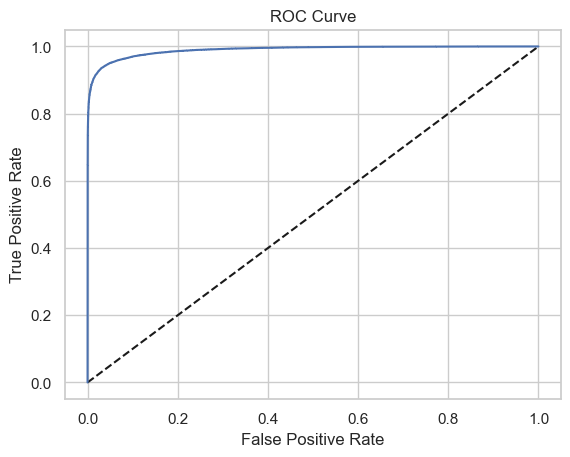

 AUC Score: 0.9894007834189393


In [63]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **7- GaussianNB:**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.8302857730968473
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     25939
           1       0.85      0.85      0.85     32359

    accuracy                           0.83     58298
   macro avg       0.83      0.83      0.83     58298
weighted avg       0.83      0.83      0.83     58298



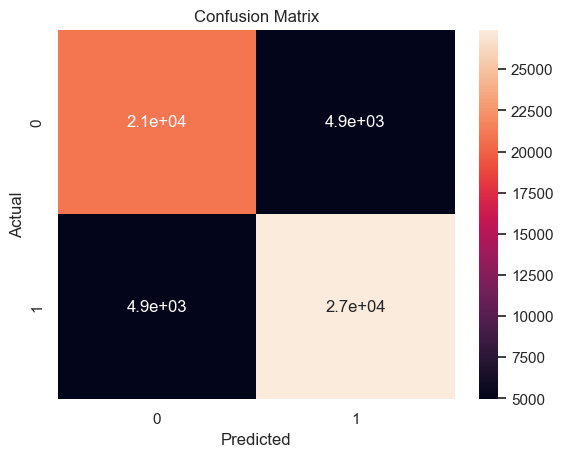

In [65]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
y_pred_proba = gnb_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

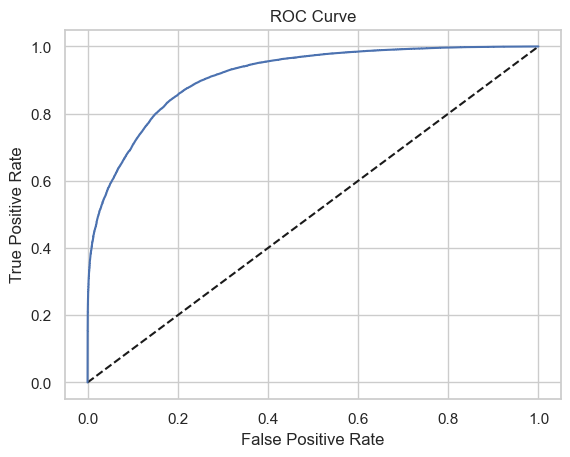

 AUC Score: 0.9117785966812353


In [66]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **8- CatBoost:**

Learning rate set to 0.083944
0:	learn: 0.5813098	total: 14.8ms	remaining: 14.7s
1:	learn: 0.4980040	total: 28.2ms	remaining: 14.1s
2:	learn: 0.4368367	total: 40ms	remaining: 13.3s
3:	learn: 0.3973471	total: 50.9ms	remaining: 12.7s
4:	learn: 0.3646410	total: 61.4ms	remaining: 12.2s
5:	learn: 0.3383263	total: 72.4ms	remaining: 12s
6:	learn: 0.3205645	total: 83.3ms	remaining: 11.8s
7:	learn: 0.3058944	total: 93.4ms	remaining: 11.6s
8:	learn: 0.2952865	total: 105ms	remaining: 11.5s
9:	learn: 0.2857023	total: 116ms	remaining: 11.5s
10:	learn: 0.2771818	total: 127ms	remaining: 11.4s
11:	learn: 0.2701503	total: 137ms	remaining: 11.3s
12:	learn: 0.2642074	total: 149ms	remaining: 11.3s
13:	learn: 0.2588444	total: 160ms	remaining: 11.2s
14:	learn: 0.2536254	total: 171ms	remaining: 11.3s
15:	learn: 0.2490310	total: 182ms	remaining: 11.2s
16:	learn: 0.2455735	total: 193ms	remaining: 11.1s
17:	learn: 0.2420234	total: 205ms	remaining: 11.2s
18:	learn: 0.2392020	total: 216ms	remaining: 11.2s
19:	lea

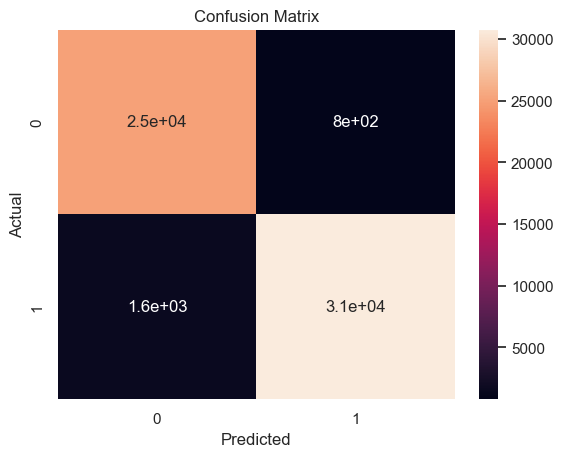

In [67]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
y_pred_proba = cb_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)    
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

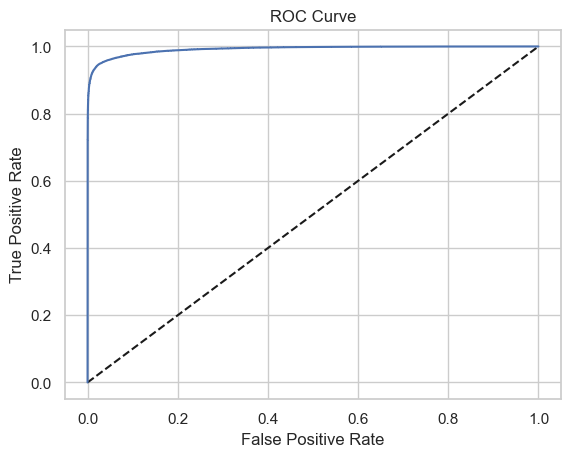

 AUC Score: 0.9917859295530178


In [68]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

[LightGBM] [Info] Number of positive: 75278, number of negative: 60749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 136027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553405 -> initscore=0.214437
[LightGBM] [Info] Start training from score 0.214437
Learning rate set to 0.083944
0:	learn: 0.5813098	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4980040	total: 24.9ms	remaining: 12.4s
2:	learn: 0.4368367	total: 36.1ms	remaining: 12s
3:	learn: 0.3973471	total: 47ms	remaining: 11.7s
4:	learn: 0.3646410	total: 58.8ms	remaining: 11.7s
5:	learn: 0.3383263	total: 71.1ms	remaining: 11.8s
6:	learn: 0.3205645	total: 82.2ms	remaining: 11.7s
7:	learn: 0.3058944	total: 93ms	remaining: 11.5s
8:	learn: 0

<Figure size 1000x600 with 0 Axes>

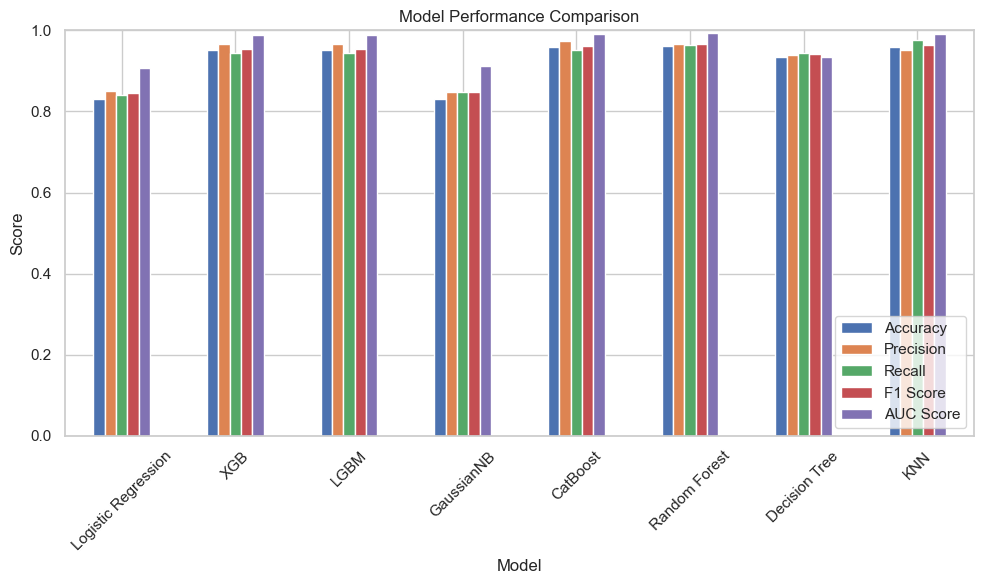

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []
best_model = None
best_model_name = ""
best_f1 = 0

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Basic metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Try AUC
        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)
                auc = roc_auc_score(y_test, y_pred_proba[:, 1])
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test)
                auc = roc_auc_score(y_test, y_scores)
            else:
                auc = None
        except Exception as e:
            print(f"[{name}] AUC Error: {e}")
            auc = None

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "AUC Score": auc
        })

        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_model_name = name

    except Exception as e:
        print(f"[{name}] Error during training/evaluation: {e}")

# Results as DataFrame
results_df = pd.DataFrame(results)
print("Model Performance:\n", results_df)

# Best model
print(f"\nBest Model Based on F1 Score: {best_model_name} (F1 Score = {best_f1:.4f})")

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score","AUC Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### **Best Model is (Random Forest)**